In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
company = pd.read_csv('Company_Data.csv')

In [3]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [ ]:
# Requirement is convert sales into Categorical Value - Take  average of Sales and if Sales is greater than Average then take Sales as good (1) and lessthan or equal to Average then take sales as average

In [6]:
len(company)

400

In [7]:
company['Sales_New']='S'
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_New
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,S
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,S
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,S
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,S
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,S
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,S
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,S
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,S
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,S


In [8]:
for i in range (0,len(company)):
    if company.Sales[i] < company.Sales.mean():
        company.Sales_New[i]=0   # 0 Indicates low_sales 
    else:
        company.Sales_New[i]=1   # 1 Inddicates High_sales

<ipython-input-8-f9b3b43b1175>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company.Sales_New[i]=1   # 1 Inddicates High_sales
<ipython-input-8-f9b3b43b1175>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company.Sales_New[i]=0   # 0 Indicates low_sales


In [9]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_New
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0


In [10]:
company.Sales_New.unique()

array([1, 0], dtype=object)

In [12]:
company.Sales_New.value_counts()

0    201
1    199
Name: Sales_New, dtype: int64

In [13]:
#Dropping "Sales" column
company=company.drop(['Sales'],axis=1)


In [14]:
company.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_New
0,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,141,64,3,340,128,Bad,38,13,Yes,No,0


In [ ]:
#Apply Label encoding on categorical data

In [16]:
label_encoder = preprocessing.LabelEncoder()
company['ShelveLoc']= label_encoder.fit_transform(company['ShelveLoc'])
company['Urban']= label_encoder.fit_transform(company['Urban']) 
company['US']= label_encoder.fit_transform(company['US']) 


In [17]:
company.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_New
0,138,73,11,276,120,0,42,17,1,1,1
1,111,48,16,260,83,1,65,10,1,1,1
2,113,35,10,269,80,2,59,12,1,1,1
3,117,100,4,466,97,2,55,14,1,1,0
4,141,64,3,340,128,0,38,13,1,0,0


In [18]:
X=company.iloc[:,:-1]

In [19]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [21]:
Y=company.iloc[:,-1:]

In [22]:
Y

,Sales_New
0,1
1,1
2,1
3,0
4,0
...,...
395,1
396,0
397,0
398,0


In [ ]:
# Convert X and Y into Array

In [25]:
x=np.asarray(X,dtype=np.int)
x

array([[138,  73,  11, ...,  17,   1,   1],
       [111,  48,  16, ...,  10,   1,   1],
       [113,  35,  10, ...,  12,   1,   1],
       ...,
       [162,  26,  12, ...,  18,   1,   1],
       [100,  79,   7, ...,  12,   1,   1],
       [134,  37,   0, ...,  16,   1,   1]])

In [26]:
y=np.asarray(Y,dtype=np.int)
y

array([[1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
    

In [27]:
#Model with Train and Test Splitting data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=40)

In [ ]:
#Building tree classfier using Entropy

In [28]:
model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

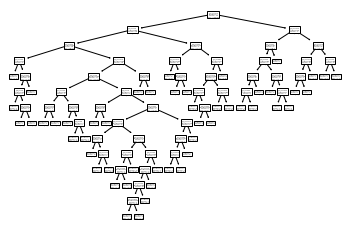

In [29]:
#PLot the decision tree
tree.plot_tree(model);

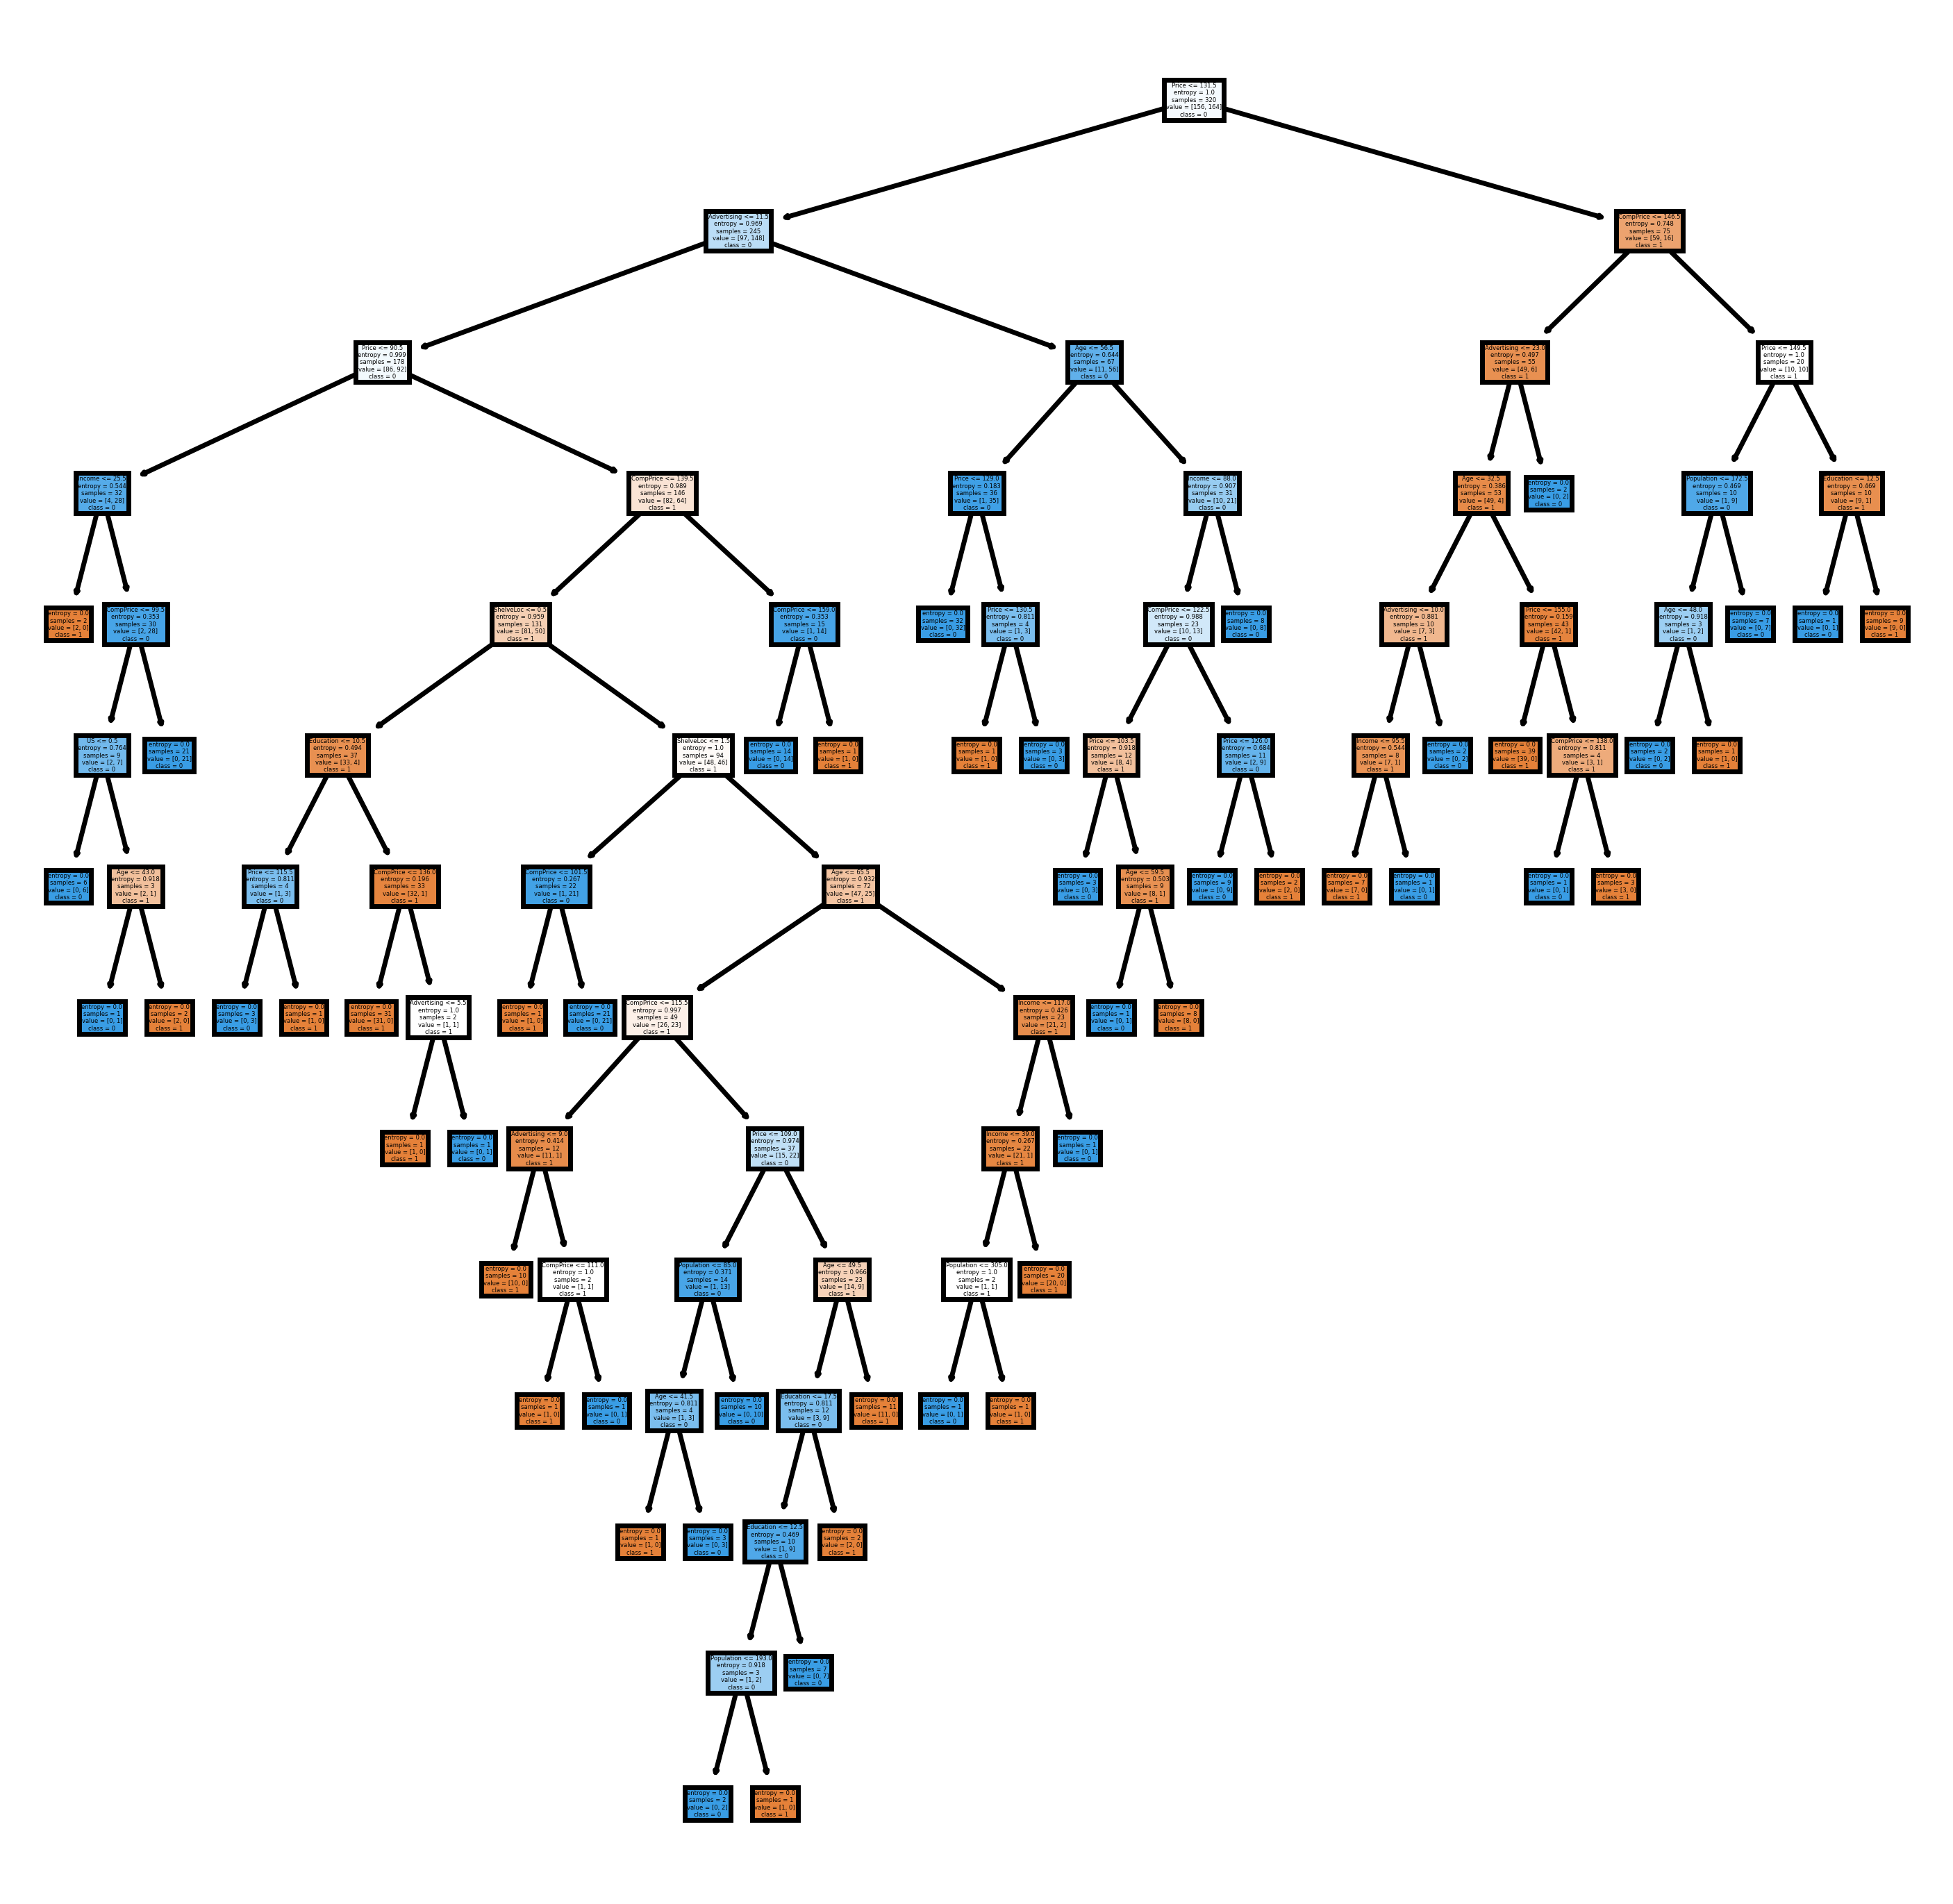

In [53]:
import matplotlib.pyplot as plt
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US'] 
cn=['1', '0'] # class Names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (7,7), dpi=500)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [ ]:
#prediction

In [31]:
preds=model.predict(x_test)

In [32]:
preds

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1])

In [33]:
pd.Series(preds).value_counts() # getting the count of each category 

1    42
0    38
dtype: int64

In [35]:
# Accuracy 
np.mean(preds==y_test)

0.496875

In [ ]:
# Model with  KFold

In [36]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10, random_state=7)

C:\Users\Sys\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [40]:
model1 = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [39]:
Output = cross_val_score(model1, x, y, cv=kfold)
Output

array([0.8  , 0.7  , 0.625, 0.65 , 0.75 , 0.775, 0.75 , 0.625, 0.775,
       0.75 ])

In [42]:
print(Output.mean())

0.72


In [ ]:
#Building Decision treee with CART - Gini with Train Test

In [43]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [44]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

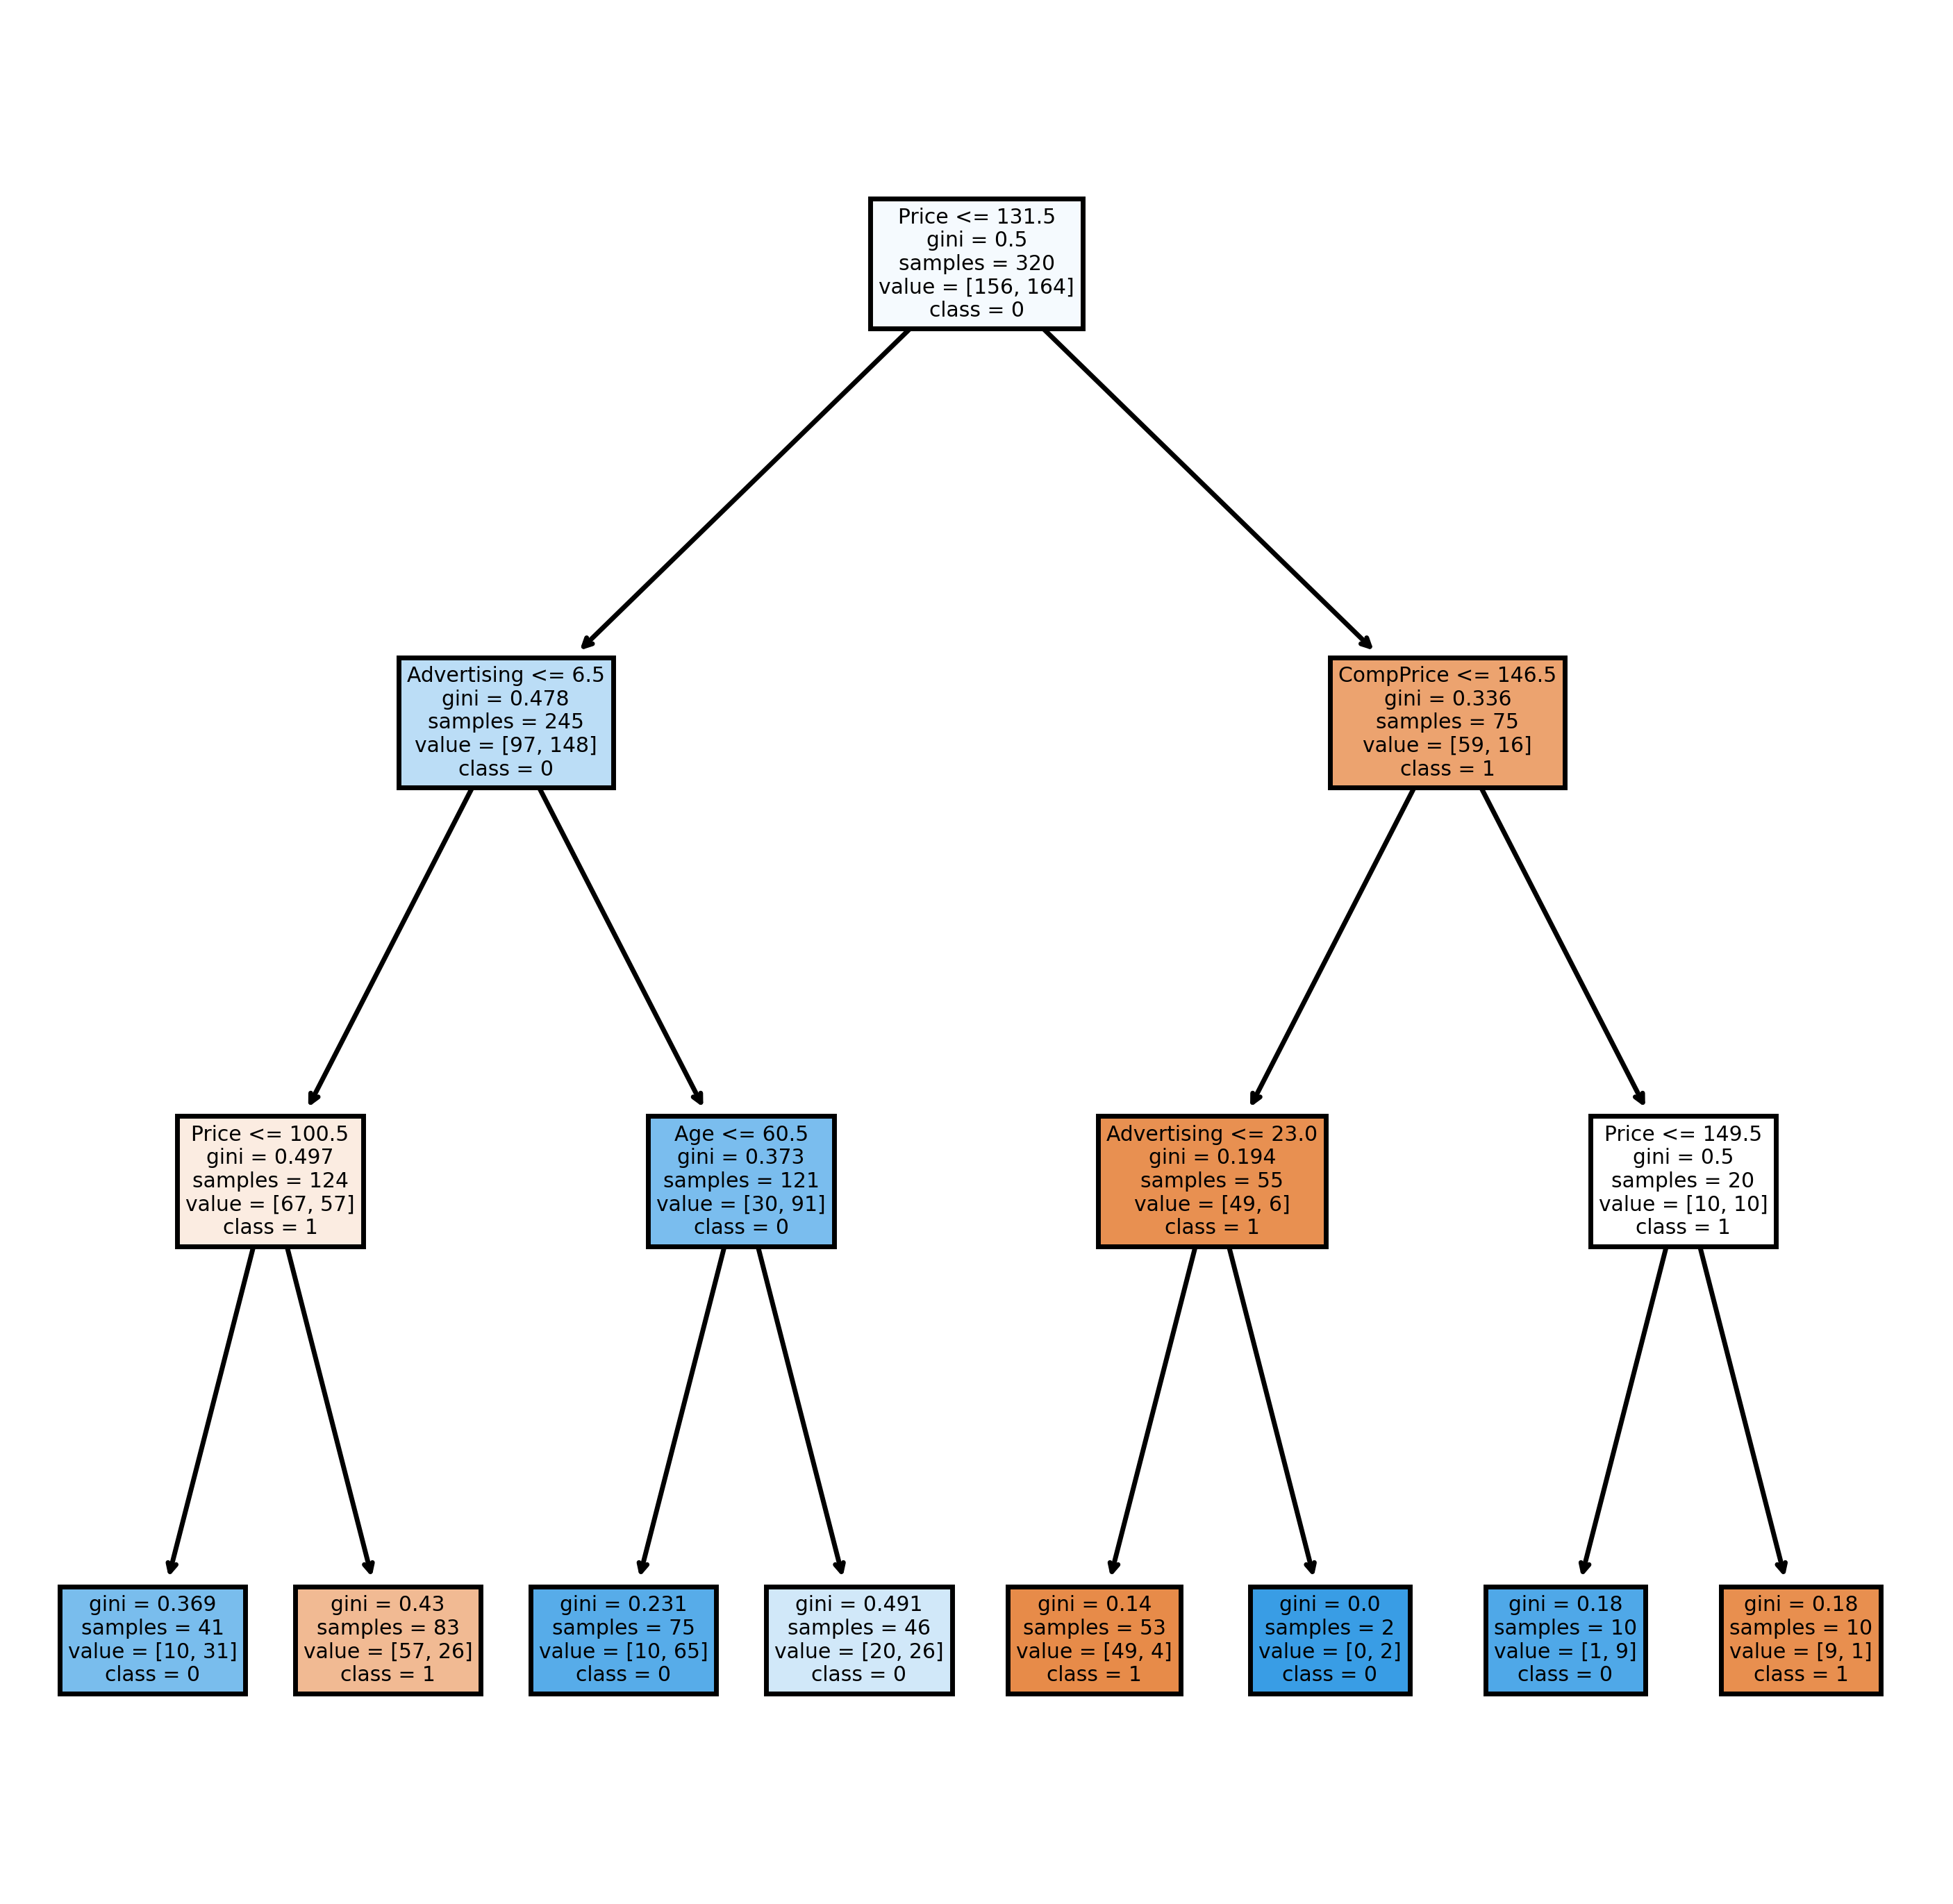

In [52]:
import matplotlib.pyplot as plt
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US'] 
cn=['1', '0'] # class Names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (7,7), dpi=500)
tree.plot_tree(model_gini,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [45]:
#Prediction and computing the accuracy
preds=model_gini.predict(x_test)
np.mean(preds==y_test)

0.496875

In [ ]:
#Building Decision treee with CART - Gini KFold

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
model_gini_1 = DecisionTreeClassifier(criterion ='gini',max_depth=5)
model_gini_1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

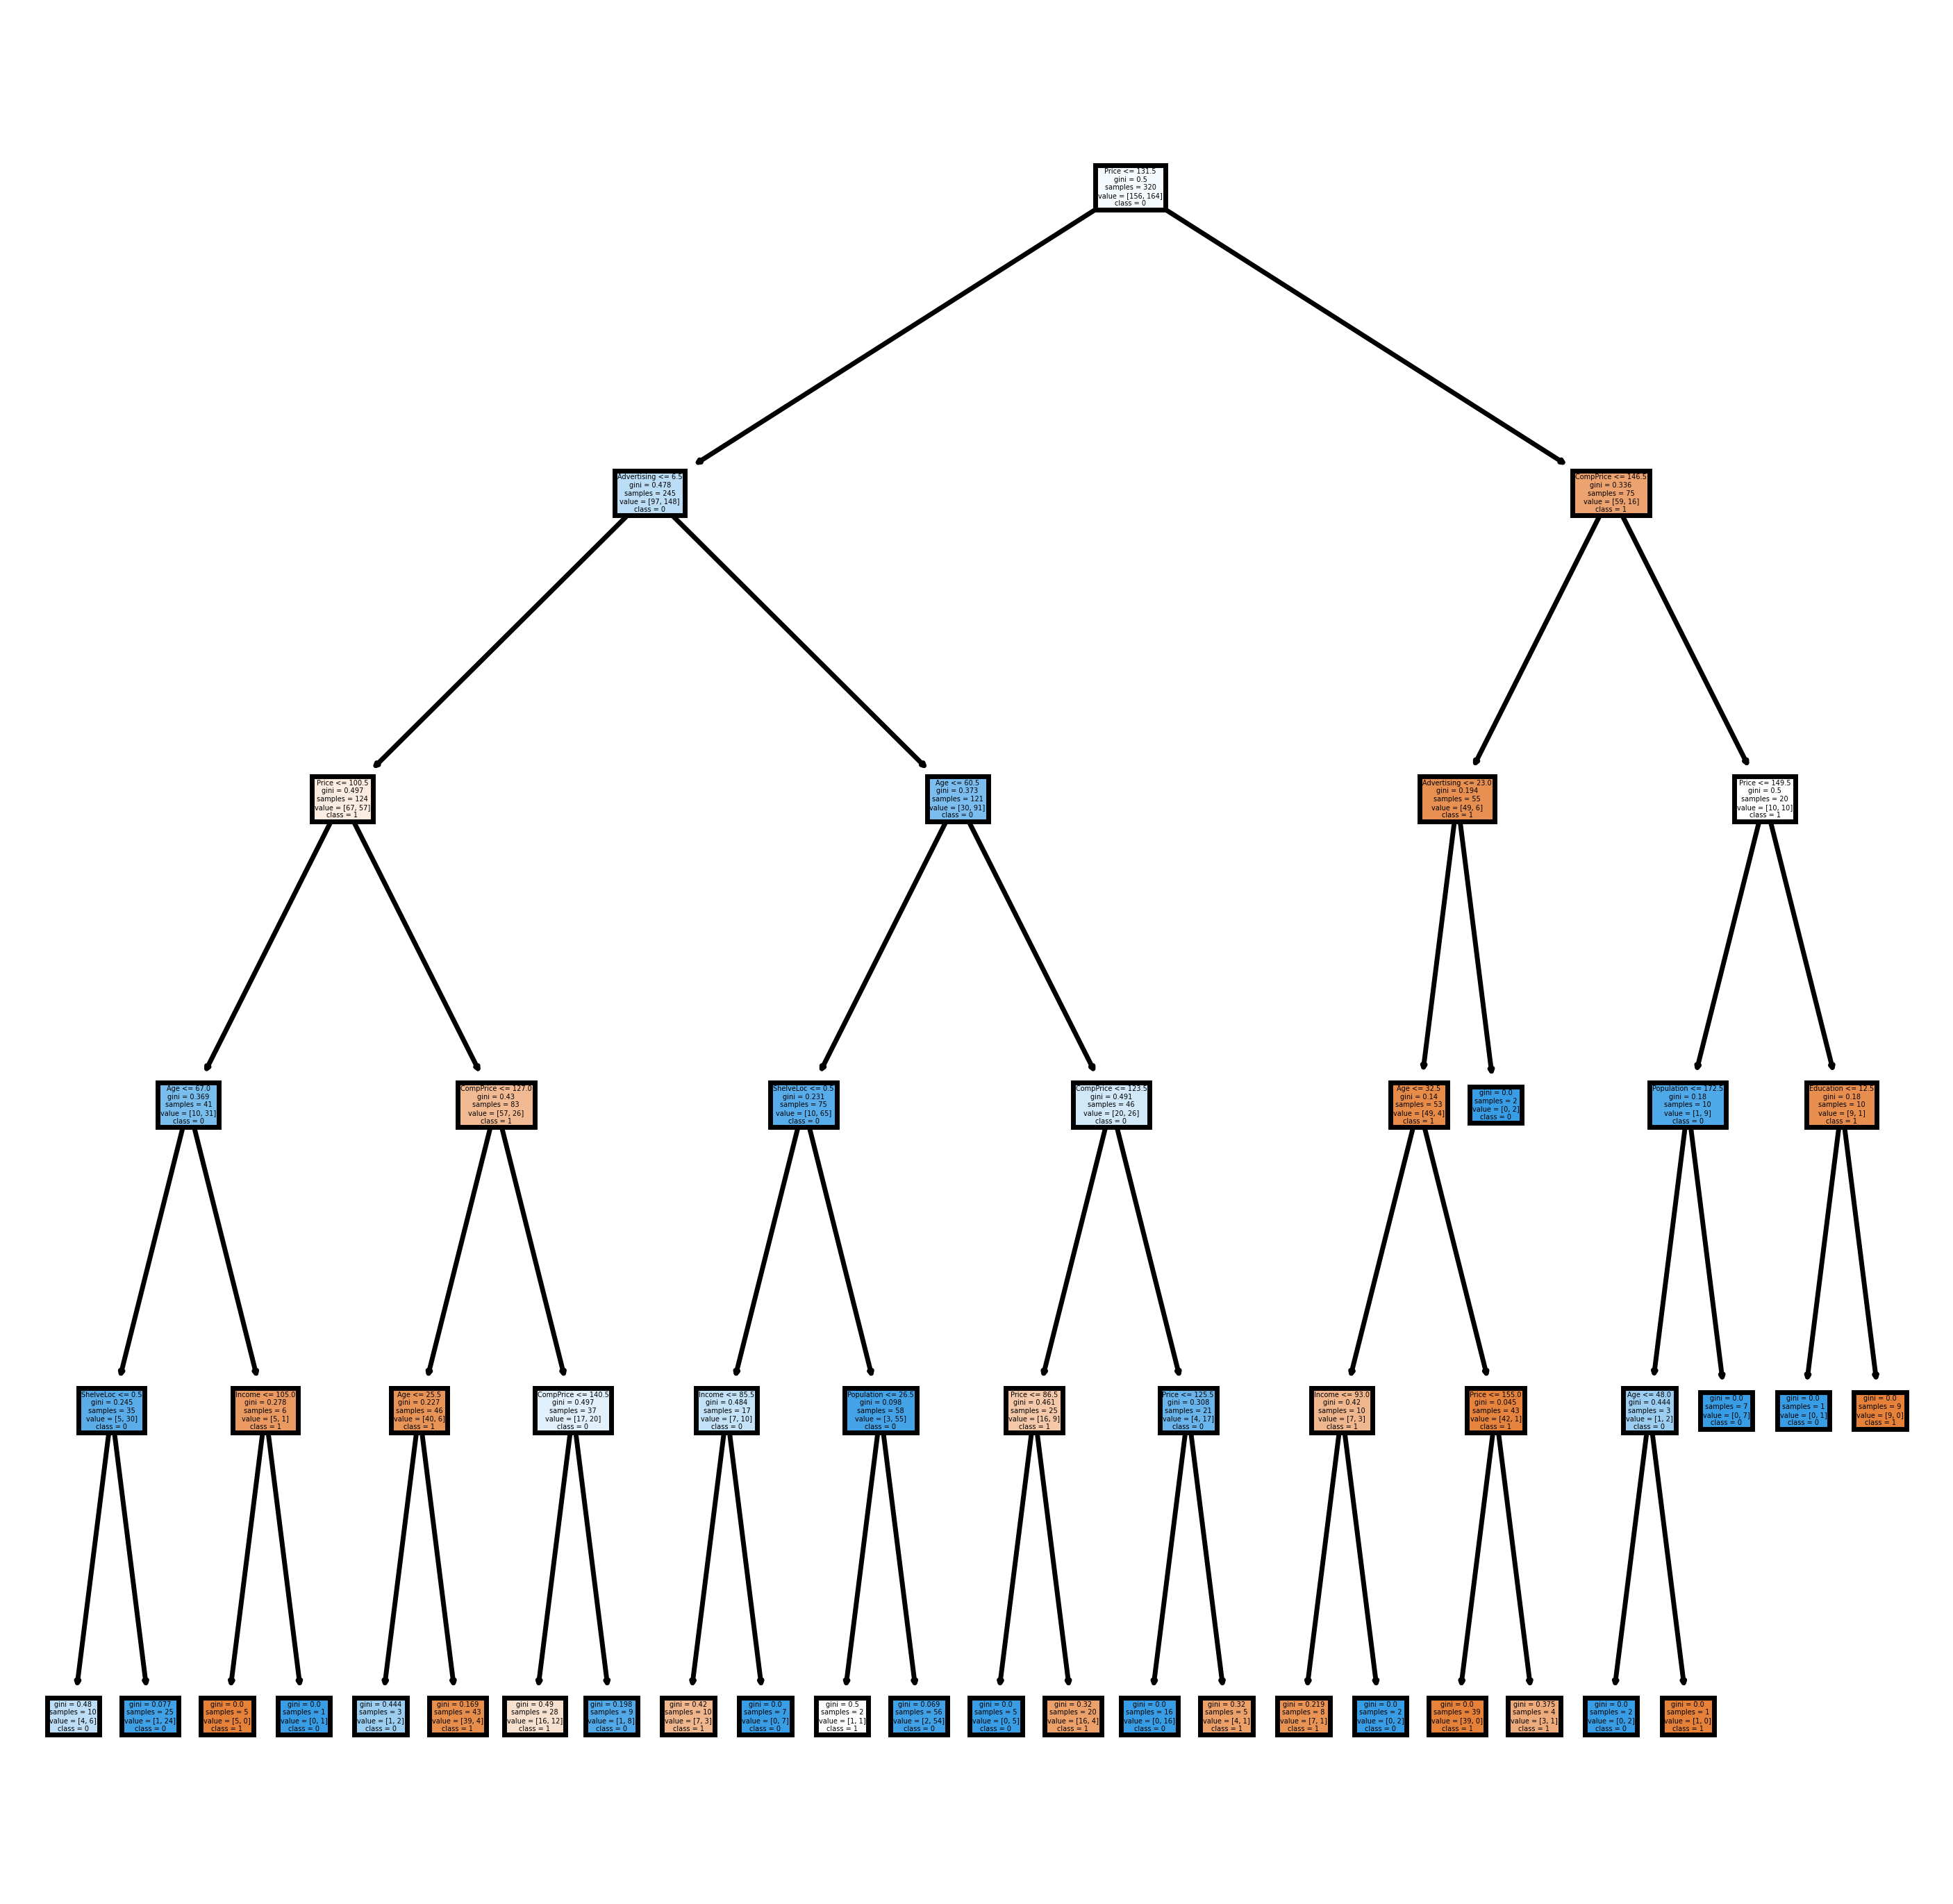

In [51]:
import matplotlib.pyplot as plt
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US'] 
cn=['1', '0'] # class Names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (7,7), dpi=500)
tree.plot_tree(model_gini_1,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [49]:
Output_gini_1 = cross_val_score(model_gini_1, x, y, cv=kfold)
Output_gini_1

array([0.75 , 0.7  , 0.575, 0.625, 0.725, 0.75 , 0.775, 0.625, 0.8  ,
       0.625])

In [50]:
print(Output_gini_1.mean())

0.6950000000000001


In [ ]:
# Model 2 with Entropy Method with Kflold CV has given the highest accuracy of 72%.